In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv')

In [3]:
print(dataset.columns)
print(dataset)

Index(['Conductivity', 'timestamps', 'Water_Level', 'Dissolved_Oxygen', 'Ph',
       'Temperature', 'dk'],
      dtype='object')
     Conductivity  timestamps  Water_Level  Dissolved_Oxygen   Ph  \
0           304.0  2024-06-13        43.53               2.3  7.4   
1           309.0  2024-06-15        43.08               2.2  7.6   
2           308.0  2024-06-16        42.87               2.2  7.6   
3           308.0  2024-06-17        42.68               2.2  7.6   
4           308.0  2024-06-18        42.54               2.2  7.6   
..            ...         ...          ...               ...  ...   
352         298.0  2025-06-08        40.77               2.1  7.8   
353         299.0  2025-06-09        40.78               2.1  7.8   
354         298.0  2025-06-10        40.81               2.1  7.8   
355         298.0  2025-06-11        40.81               2.1  7.8   
356         298.0  2025-06-12        40.84               2.1  7.8   

     Temperature        dk  
0           2

In [4]:
dataset=dataset.drop(columns=['dk'])
df=dataset
df['timestamps'] = pd.to_datetime(df['timestamps'])
df = df.set_index('timestamps')

# Select only 'Temperature' and 'timestamps' columns, set 'timestamps' as index
df = dataset[['Conductivity','Ph','Temperature','Water_Level','Dissolved_Oxygen', 'timestamps']]
df['timestamps'] = pd.to_datetime(df['timestamps'])
df = df.set_index('timestamps')
print(df.head())

            Conductivity   Ph  Temperature  Water_Level  Dissolved_Oxygen
timestamps                                                               
2024-06-13         304.0  7.4         21.3        43.53               2.3
2024-06-15         309.0  7.6         21.3        43.08               2.2
2024-06-16         308.0  7.6         21.3        42.87               2.2
2024-06-17         308.0  7.6         21.3        42.68               2.2
2024-06-18         308.0  7.6         21.3        42.54               2.2


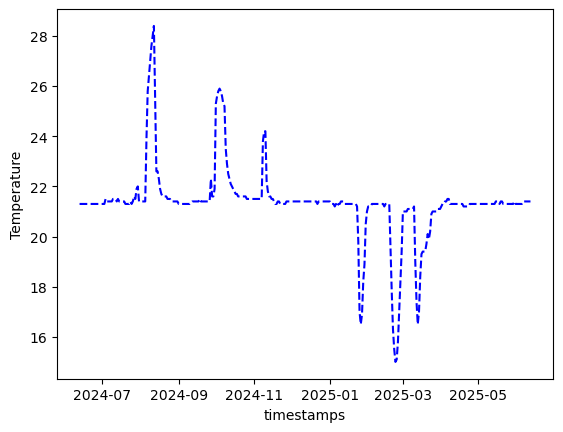

In [5]:
import seaborn as sns
sns.lineplot(x=df.index, y=df['Temperature'], linestyle='--', color='blue')
plt.xlabel('timestamps')
plt.ylabel('Temperature')   
plt.show()

In [6]:
#sns.lineplot(x=df.index, y=df['Conductivity'], linestyle='--',color='orange')
#plt.xlabel('timestamps')
#plt.ylabel('Conductivity')   
#plt.show()

In [7]:
# sns.lineplot(x=df.index, y=df['Ph'], linestyle='--',color='purple')
# plt.xlabel('timestamps')
# plt.ylabel('Ph Level')   
# plt.show()

In [8]:

temperature_mask = (df['Temperature'] >= 20) & (df['Temperature'] <= 22)
df_filtered = df[temperature_mask].copy()

# After filtering
print("\nAfter filtering:")
print(f"DataFrame shape: {df_filtered.shape}")
print(f"Index (timestamps) range: {df_filtered.index.min()} to {df_filtered.index.max()}")
print(f"Temperature range: {df_filtered['Temperature'].min():.2f} to {df_filtered['Temperature'].max():.2f}")

# Show which timestamps were removed
removed_timestamps = df.index[~temperature_mask]
print(f"\nRemoved {len(removed_timestamps)} timestamps along with temperature values")
print(f"Example removed timestamps: {removed_timestamps[:5].tolist()}")
# Update the dataframe
df = df_filtered


After filtering:
DataFrame shape: (301, 5)
Index (timestamps) range: 2024-06-13 00:00:00 to 2025-06-12 00:00:00
Temperature range: 20.10 to 22.00

Removed 56 timestamps along with temperature values
Example removed timestamps: [Timestamp('2024-08-06 00:00:00'), Timestamp('2024-08-07 00:00:00'), Timestamp('2024-08-08 00:00:00'), Timestamp('2024-08-09 00:00:00'), Timestamp('2024-08-10 00:00:00')]


In [9]:
print(df['Temperature'].values)

[21.3 21.3 21.3 21.3 21.3 21.3 21.3 21.3 21.3 21.3 21.3 21.3 21.3 21.3
 21.3 21.3 21.3 21.3 21.3 21.3 21.5 21.4 21.4 21.4 21.4 21.4 21.5 21.5
 21.5 21.4 21.5 21.4 21.4 21.3 21.3 21.3 21.3 21.4 21.3 21.4 21.6 21.5
 21.9 22.  21.4 21.4 21.4 21.4 21.4 21.4 21.9 21.7 21.6 21.6 21.6 21.6
 21.5 21.5 21.5 21.4 21.4 21.4 21.4 21.3 21.3 21.3 21.3 21.3 21.3 21.3
 21.3 21.3 21.3 21.4 21.4 21.4 21.4 21.4 21.4 21.5 21.4 21.4 21.4 21.4
 21.4 21.4 21.4 21.4 21.6 21.6 21.9 22.  21.9 21.8 21.7 21.7 21.6 21.6
 21.6 21.6 21.6 21.6 21.6 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5 21.5
 21.5 21.5 21.5 21.5 21.8 21.6 21.6 21.5 21.5 21.4 21.3 21.3 21.4 21.4
 21.3 21.3 21.3 21.3 21.3 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4
 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4
 21.4 21.4 21.3 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.4 21.3
 21.3 21.3 21.2 21.3 21.2 21.3 21.3 21.4 21.4 21.4 21.3 21.3 21.3 21.3
 21.3 21.3 21.3 21.3 21.3 21.3 21.2 20.5 21.  21.2 21.2 21.2 21.3 21.3
 21.3 

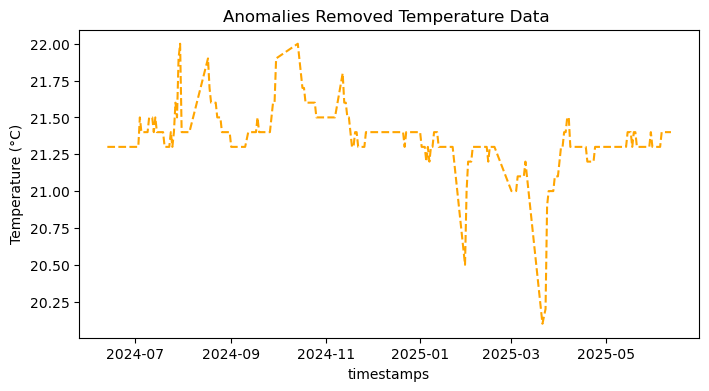

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.lineplot(x=df.index, y=df['Temperature'], linestyle='--', color='orange')
plt.title('Anomalies Removed Temperature Data ')
plt.xlabel('timestamps')
plt.ylabel('Temperature (°C)')   
plt.show()  

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np

In [12]:
# --- 2. Normalize Data ---
scaler = MinMaxScaler(feature_range=(-1, 1))
# Normalize only the 'Temperature' column
scaled_data = scaler.fit_transform(df[['Temperature']])
print('Scaled data shape:', scaled_data.shape)

## 3. Split Data into Training and Test Sets
scaled_data = scaled_data.reshape(-1, 1)  # Reshape back to original
# Split into training and test sets (80% train, 20% test)
training_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data_original = scaled_data[int(len(scaled_data) * 0.8):]

lookback = 10
test_data = np.concatenate([training_data[-lookback:], test_data_original], axis=0)

print("Training data shape:", training_data.shape)
print(training_data[:5])
print(np.max(training_data), np.min(training_data))
print('-----------')
print("Original test data shape:", test_data_original.shape)
print("Test data with context shape:", test_data.shape)
print(test_data[:5])
print(np.max(test_data), np.min(test_data))

Scaled data shape: (301, 1)
Training data shape: (240, 1)
[[0.26315789]
 [0.26315789]
 [0.26315789]
 [0.26315789]
 [0.26315789]]
1.0 -1.0
-----------
Original test data shape: (61, 1)
Test data with context shape: (71, 1)
[[0.26315789]
 [0.26315789]
 [0.36842105]
 [0.36842105]
 [0.47368421]]
0.47368421052631504 0.15789473684210265


In [13]:
# Plot training and test data consecutively
from matplotlib.dates import DateFormatter
plt.figure(figsize=(12, 6))

# Get the original index for plotting
train_index = df.index[:len(training_data)]
test_index = df.index[len(training_data)-lookback:len(training_data) + len(test_data)]

# Inverse transform to get original values
train_values = scaler.inverse_transform(training_data)
test_values = scaler.inverse_transform(test_data)
# # Plot original data for comparison
# plt.plot(df_min_high.index, df_min_high['Water_Level'], color='green', alpha=0.5, label='Original Data')

# plt.plot(train_index, train_values, color='blue', label='Training Data', linestyle='--')
# plt.plot(test_index, test_values, color='orange', label='Test Data')

# plt.title('Water Level: Training vs Test Data')
# plt.xlabel('Date')
# plt.ylabel('Water Level')
# plt.legend()
# plt.grid(True, alpha=0.3)
# date_form = DateFormatter("%Y-%m-%d")
# plt.gca().xaxis.set_major_formatter(date_form)
# plt.gcf().autofmt_xdate()
# plt.tight_layout()
# plt.show()

<Figure size 1200x600 with 0 Axes>

In [14]:
# --- 4. Prepare Data for LSTM ---
def create_sliding_windows(dataset, look_back=10):
	dataX, dataY = [], []
	for i in range(look_back, len(dataset)):
		dataX.append(dataset[i-look_back:i, 0])
		dataY.append(dataset[i, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
look_back = 10
trainX_, trainY_ = create_sliding_windows(training_data, look_back)
testX_, testY_   = create_sliding_windows( test_data, look_back)

print("TrainX shape:", trainX_.shape)
print("TrainY shape:", trainY_.shape)
print("TestX shape:", testX_.shape)
print("TestY shape:", testY_.shape)

TrainX shape: (230, 10)
TrainY shape: (230,)
TestX shape: (61, 10)
TestY shape: (61,)


In [16]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX_, (trainX_.shape[0], trainX_.shape[1], 1))
testX = np.reshape(testX_, (testX_.shape[0], testX_.shape[1], 1))

print("Reshaped TrainX shape:", trainX.shape)
print("Reshaped TestX shape:", testX.shape)

Reshaped TrainX shape: (230, 10, 1)
Reshaped TestX shape: (61, 10, 1)


In [17]:
## 4. Building Model
model=Sequential()
model.add(LSTM(32, input_shape=(trainX.shape[1], 1), return_sequences=True))
model.add(LSTM(32, return_sequences=False))  # Last LSTM layer does not need return_sequences
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1))  # Output layer for regression
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.summary()
model.compile(optimizer=opt, loss='mse')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,849 (58.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# --- 5. Train the Model
trained = model.fit(trainX, trainY_, epochs=250, batch_size=1)

Epoch 1/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3201
Epoch 2/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5194  
Epoch 3/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4480 
Epoch 4/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3931
Epoch 5/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4973
Epoch 6/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4078
Epoch 7/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3238
Epoch 8/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3383
Epoch 9/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3038
Epoch 10/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3493
Epoch 11/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2322
Epoch 12/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2815  
Epoch 13/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2334  
Epoch 14/250
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1927  
Epoch 15/250
230/230 ━━━━━━━━━━━━━

In [19]:
# make predictions
train_set_scaled_predictions = np.zeros((trainX.shape[0], 1))
for i in range(0, trainX.shape[0]):
    prediction = model.predict(trainX[i].reshape(1, trainX[i].shape[0], 1))
    train_set_scaled_predictions[i] = prediction

test_set_scaled_predictions = np.zeros((testX.shape[0], 1))
for i in range(0, testX.shape[0]):
    prediction = model.predict(testX[i].reshape(1, testX[i].shape[0], 1))
    test_set_scaled_predictions[i] = prediction


# invert predictions
train_set_predictions = scaler.inverse_transform(train_set_scaled_predictions)
test_set_predictions = scaler.inverse_transform(test_set_scaled_predictions)

print("Train set predictions shape:", train_set_predictions.shape)
print("Test set predictions shape:", test_set_predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━

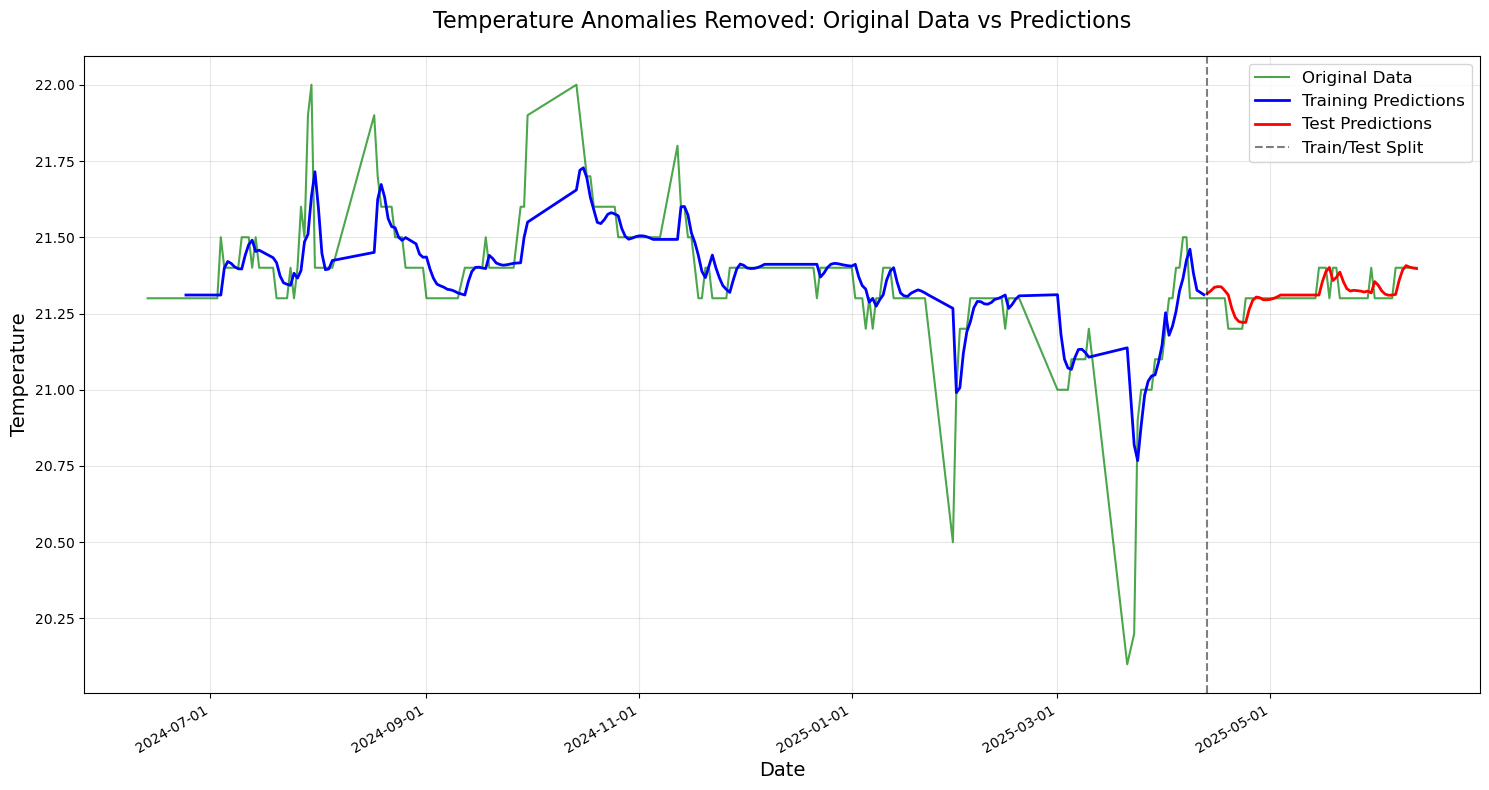

Training Performance:
  RMSE: 0.1306
  MAE: 0.0631

Test Performance:
  RMSE: 0.0369
  MAE: 0.0256

Data dimensions check:
Train predictions shape: (230, 1)
Test predictions shape: (61, 1)
Test predictions (after skipping overlap): (51, 1)
Test index length: 61


In [20]:
# Plot original data with training and test predictions
plt.figure(figsize=(15, 8))

# Get indices for proper alignment
train_pred_index = df.index[look_back:look_back + len(train_set_predictions)]

test_pred_index = df.index[trainX_.shape[0]+look_back:]

# Plot original data
plt.plot(df.index, df['Temperature'], 
         color='green', alpha=0.7, linewidth=1.5, label='Original Data')

# Plot training predictions
plt.plot(train_pred_index, train_set_predictions.flatten(), 
         color='blue', linewidth=2, label='Training Predictions')

# Plot test predictions (skip the first 'look_back' predictions which are on training data)
plt.plot(test_pred_index, test_set_predictions.flatten(), 
         color='red', linewidth=2, label='Test Predictions')

# Add a vertical line to separate training and test regions
plt.axvline(x=df.index[len(training_data)], 
           color='black', linestyle='--', alpha=0.5, label='Train/Test Split')

# Formatting
plt.title('Temperature Anomalies Removed: Original Data vs Predictions', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format x-axis dates
date_form = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# Calculate and display performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get actual values for comparison
train_actual = scaler.inverse_transform(trainY_.reshape(-1, 1))
test_actual = scaler.inverse_transform(testY_[look_back:].reshape(-1, 1))  # Skip the overlapping part

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(train_actual, train_set_predictions))
train_mae = mean_absolute_error(train_actual, train_set_predictions)

test_rmse = np.sqrt(mean_squared_error(test_actual, test_set_predictions[look_back:]))
test_mae = mean_absolute_error(test_actual, test_set_predictions[look_back:])

print(f"Training Performance:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"\nTest Performance:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")

print(f"\nData dimensions check:")
print(f"Train predictions shape: {train_set_predictions.shape}")
print(f"Test predictions shape: {test_set_predictions.shape}")
print(f"Test predictions (after skipping overlap): {test_set_predictions[look_back:].shape}")
print(f"Test index length: {len(test_pred_index)}")

In [21]:
number_of_future_forecasts = 10
future_forecasts = np.zeros((number_of_future_forecasts, 1))
last_input = testX[-1].reshape(1, testX.shape[1], 1)
for i in range(number_of_future_forecasts):
    future_prediction = model.predict(last_input)
    future_forecasts[i] = future_prediction
    # Rolling forecast: update last_input with the new prediction
    last_input = np.append(last_input[:, 1:, :], future_prediction.reshape(1, 1, 1), axis=1)

print("Future forecasts shape:", future_forecasts.shape)
# Inverse transform future forecasts
future_forecasts = scaler.inverse_transform(future_forecasts)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Future forecasts shape: (10, 1)


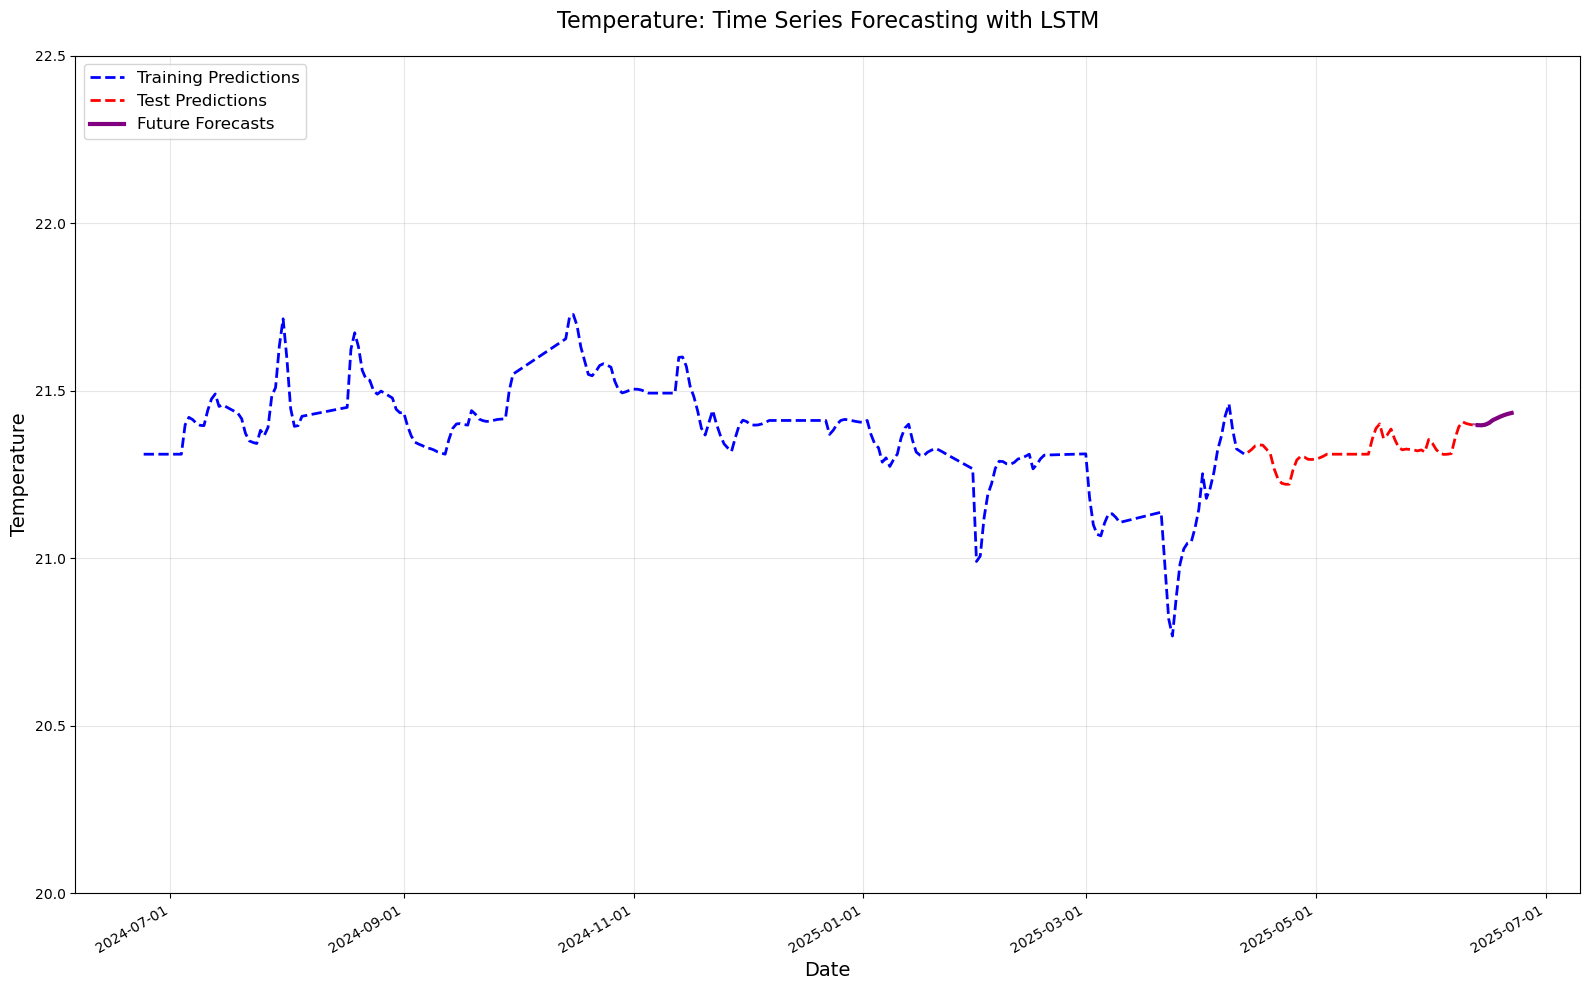

In [27]:
# Create future dates extending from the last data point
last_date = df.index[-1]
# Determine the frequency of your data (assuming daily - adjust if needed)
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), 
                           periods=number_of_future_forecasts, freq='D')

# Comprehensive plot with all data
plt.figure(figsize=(16, 10))

# Plot original data
# plt.plot(df.index, df['Temperature'], 
#          color='green', alpha=0.7, linewidth=1.5, label='Original Data')

# Plot training predictions
train_pred_index = df.index[look_back:look_back + len(train_set_predictions)]
plt.plot(train_pred_index, train_set_predictions.flatten(), 
         color='blue',linestyle='--', linewidth=2, label='Training Predictions')

# Plot test predictions (skip the first 'look_back' predictions which are on training data)
test_pred_index = df.index[trainX_.shape[0]+look_back:]
plt.plot(test_pred_index, test_set_predictions.flatten(), 
         color='red',linestyle='--', linewidth=2, label='Test Predictions')

# Plot future forecasts
plt.plot(future_dates, future_forecasts.flatten(), 
         color='purple', linewidth=3, linestyle='-', markersize=6, 
         label='Future Forecasts')

# Add vertical lines to separate regions
# plt.axvline(x=df.index[len(training_data)], 
#            color='black', linestyle='--', alpha=0.5, label='Train/Test Split')
# plt.axvline(x=df.index[-1], 
#            color='orange', linestyle='--', alpha=0.7, label='Future Forecast Start')

# Connect last actual data point to first future prediction
plt.plot([df.index[-1], future_dates[0]], 
         [df['Temperature'].iloc[-1], future_forecasts[0][0]], 
         color='purple', linestyle='-', alpha=0.7)
plt.ylim(20,22.5)
# Formatting
plt.title('Temperature: Time Series Forecasting with LSTM', 
          fontsize=16, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3)

# Format x-axis dates
date_form = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

In [23]:
model.save('lstm_temperature_model_weights.h5')

In [24]:
model.load_weights('lstm_temperature_model_weights.h5')